In [1]:
import torchvision.datasets as datasets
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchviz import make_dot

import matplotlib.pyplot as plt
import numpy as np
import torch

# Import training and test data

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [4]:
len(mnist_trainset), len(mnist_testset)

(60000, 10000)

In [5]:
img, target = mnist_trainset[np.random.randint(len(mnist_trainset))]

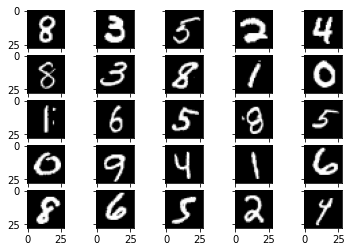

In [6]:
fig, axs = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
axs = axs.ravel()

for i in range(25):
    img, target = mnist_trainset[np.random.randint(len(mnist_trainset))]
    axs[i].imshow(img[0].numpy(), cmap='gray')

plt.show()

## Create dataloader

In [7]:
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=4, shuffle=True, num_workers=2)

# Initialize model

In [8]:
# Build the neural network, expand on top of nn.Module
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # define layers
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  # define forward function
  def forward(self, t):
    # conv 1
    t = self.conv1(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    # conv 2
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    # fc1
    t = t.reshape(-1, 12*4*4)
    t = self.fc1(t)
    t = F.relu(t)

    # fc2
    t = self.fc2(t)
    t = F.relu(t)

    # output
    t = self.out(t)
    # don't need softmax here since we'll use cross-entropy as activation.

    return t

In [9]:
net = Network()

In [16]:
net

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [10]:
imgs, targets = next(iter(trainloader))

In [11]:
dummy_out = net(imgs)

In [12]:
x = torch.zeros(1, 1, 28, 28, dtype=torch.float, requires_grad=False)
out = net(x)
#make_dot(out)  # plot graph of variable, not of a nn.Module

In [15]:
#make_dot(out, params=dict(list(net.named_parameters()))).render("rnn_torchviz", format="png")